In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("supermarket_sales.csv")
print(df.shape)

(1000, 17)


In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
print("Dataset contains {} row and {} colums".format(df.shape[0],df.shape[1]))

Dataset contains 1000 row and 17 colums


**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


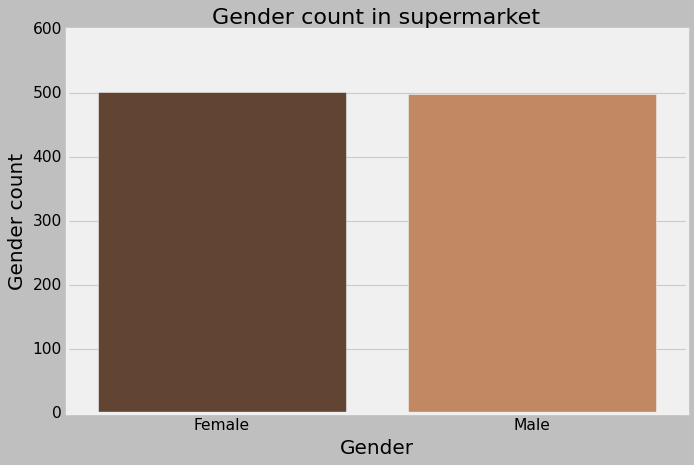

In [36]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=df , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

Here, we can observe that there are almost as many men as women entering the store. However, the visualisation is dubious. Check the numerical data.

In [11]:
df.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


**Customer type**

Text(0, 0.5, 'Customer Count')

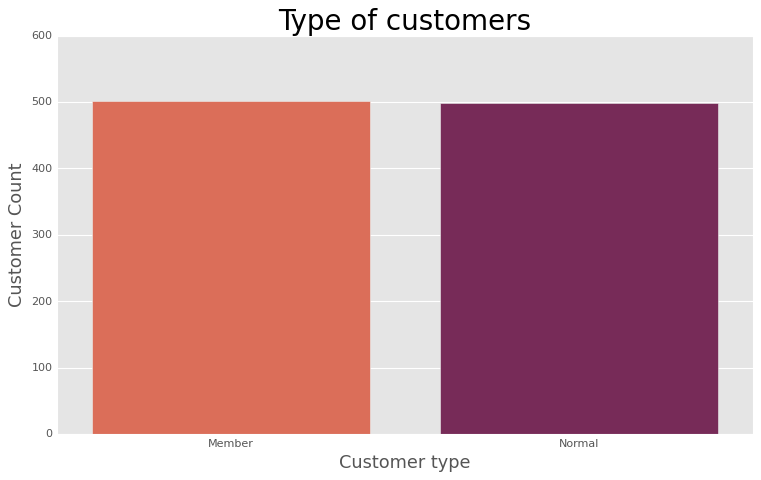

In [37]:
plt.style.use('ggplot')
plt.figure(figsize= (10,6))
ax = sns.countplot(x = "Customer type", data = df, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 25)
ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)

Let's verify the numerical data as the display appears strange.

In [16]:
df.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


The sort of consumer in every branch combined is shown above. Let's verify for different branches.

Text(0, 0.5, 'Customer Count')

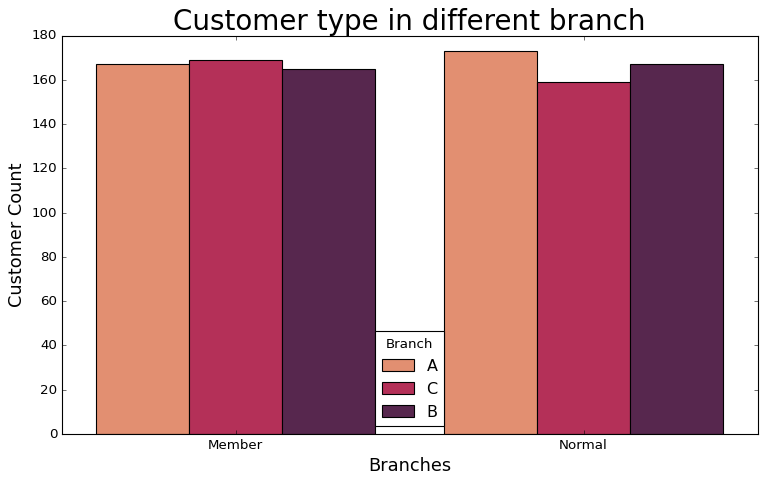

In [38]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = df, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

**Checking Different Payment Methods**

Text(0, 0.5, ' Customer Count')

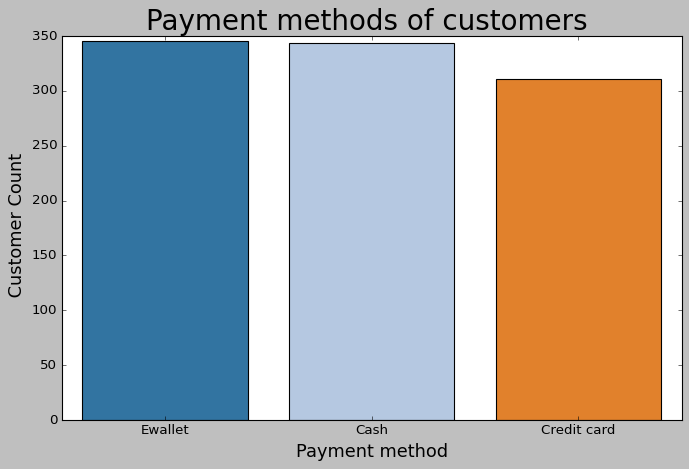

In [39]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = "Payment", data = df, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

**Payment method distribution in all branches**

Text(0, 0.5, 'Peple Count')

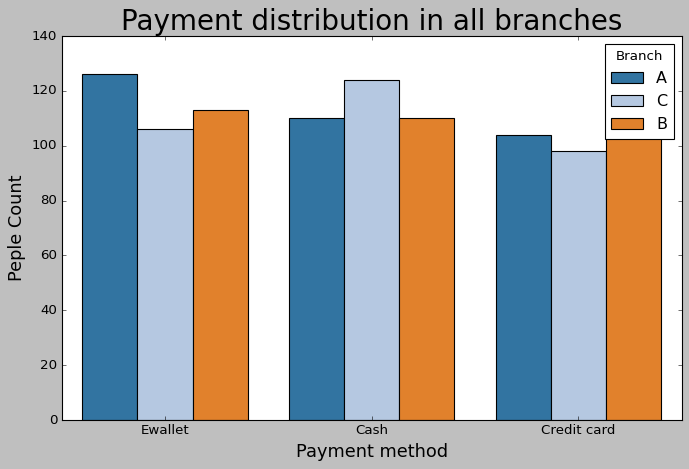

In [40]:
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

**the rating distribution in 3 branches**

Text(0, 0.5, 'Rating distribution')

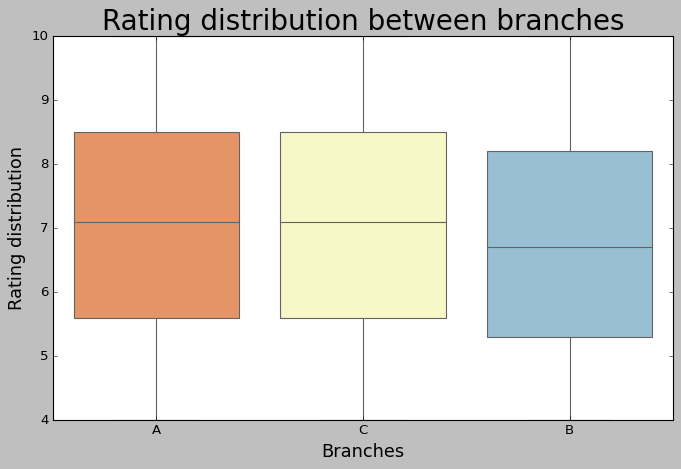

In [41]:
plt.figure(figsize=(10,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =df, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

It is evident that branches A and C have average ratings more than seven, whereas branch B has a rating below seven.

**Max sales time**

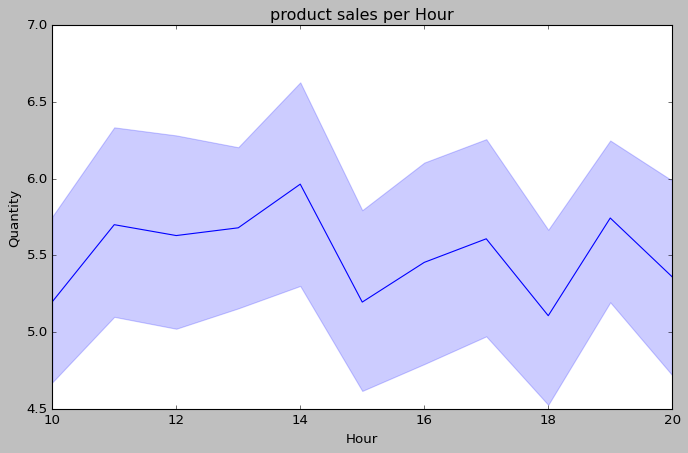

In [42]:
df["Time"]= pd.to_datetime(df["Time"])
df["Hour"]= (df["Time"]).dt.hour
plt.figure(figsize=(10,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = df).set_title("product sales per Hour")

It is clear that the supermarket sells the majority of its stock at 14:00 local time.

**Rating vs sales**

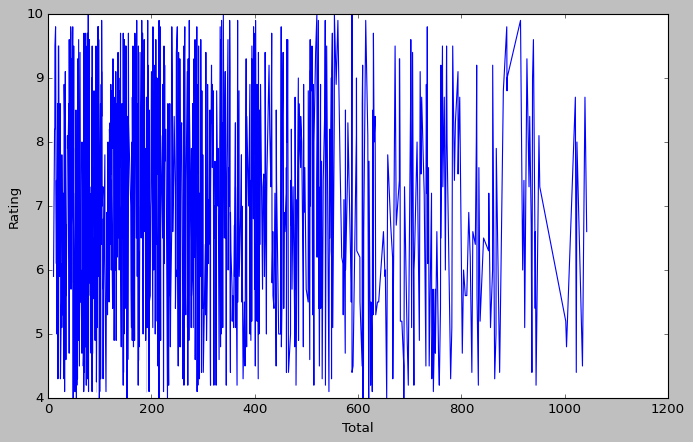

In [43]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=df)

**BOX plot**

Text(0, 0.5, 'Product Line')

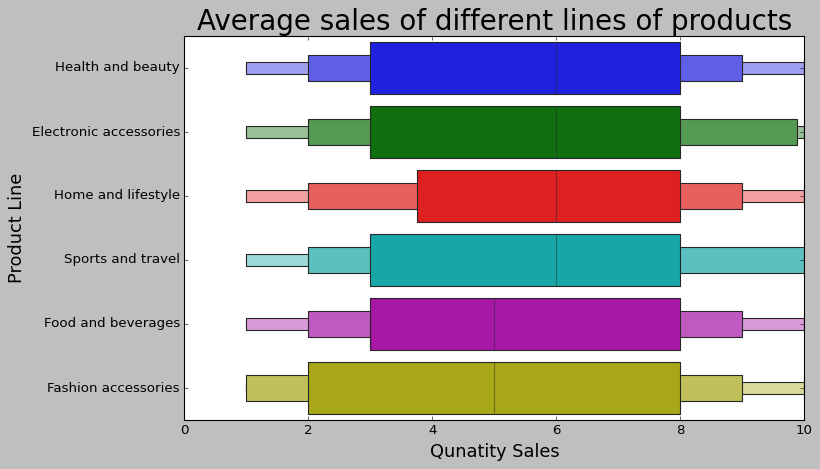

In [28]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = df,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Here, we can observe the typical sales for several product categories. The two industries with the largest sales are health and beauty and fashion accessories.

**the sales count of the products**

Text(0, 0.5, 'Product Line')

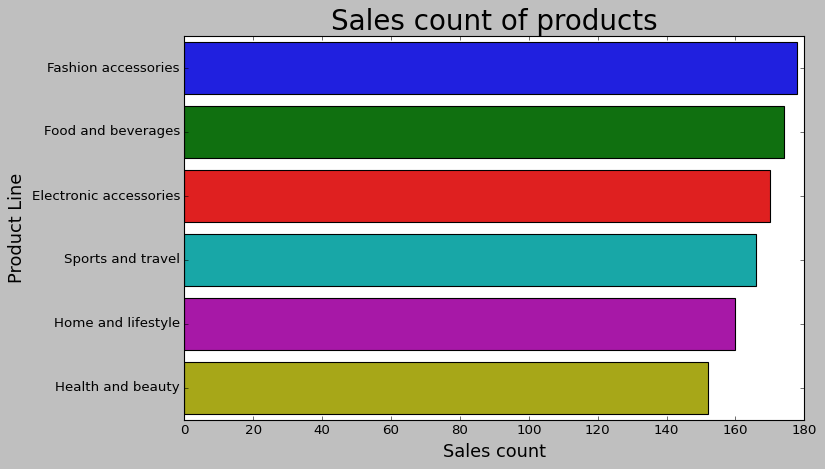

In [44]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='Product line', data=df, order = df['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

From the above chart, we can observe the top-selling goods.

**Total sales of product using boxenplot**

Text(0, 0.5, 'Product Line')

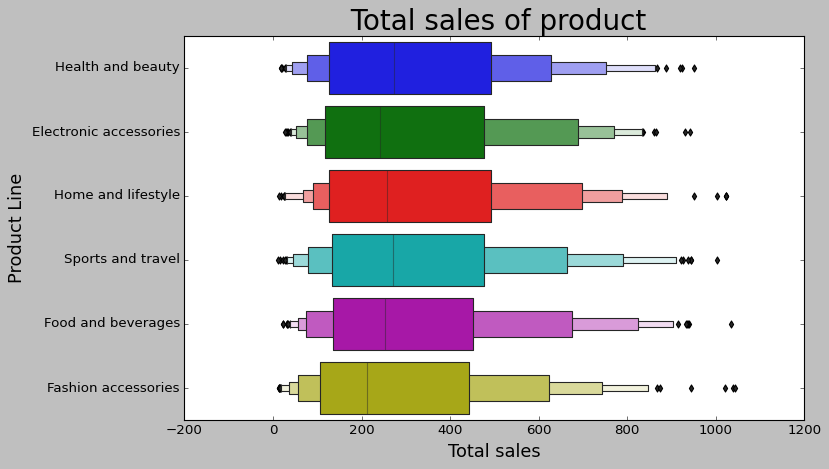

In [45]:
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax = sns.boxenplot(y= "Product line", x= "Total", data = df)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

**average ratings of products**

Text(0, 0.5, 'Product line')

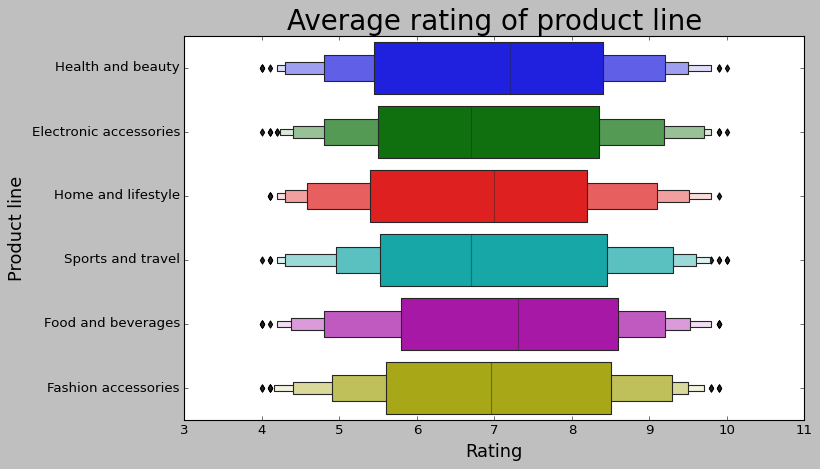

In [46]:
plt.figure(figsize = (10,6))
plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = df)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

**Product sales on the basis of gender**

Text(0, 0.5, 'Product Line')

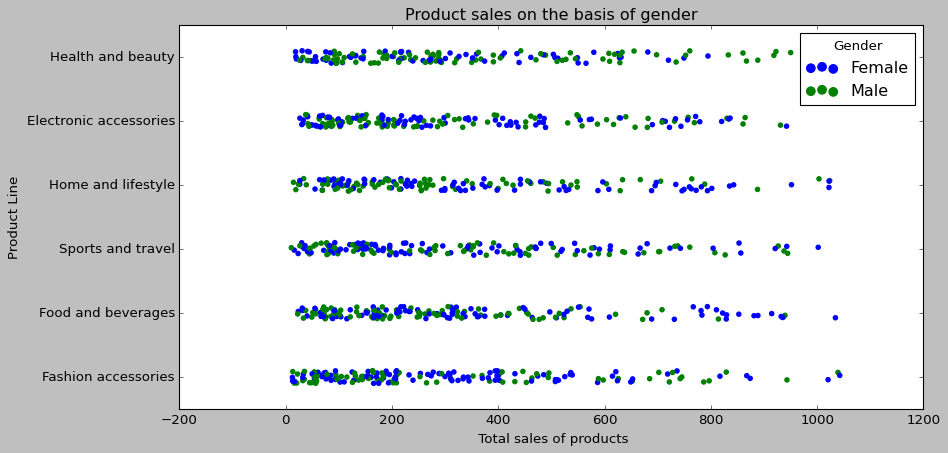

In [32]:
plt.style.use('classic')
plt.figure(figsize = (12,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = df)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

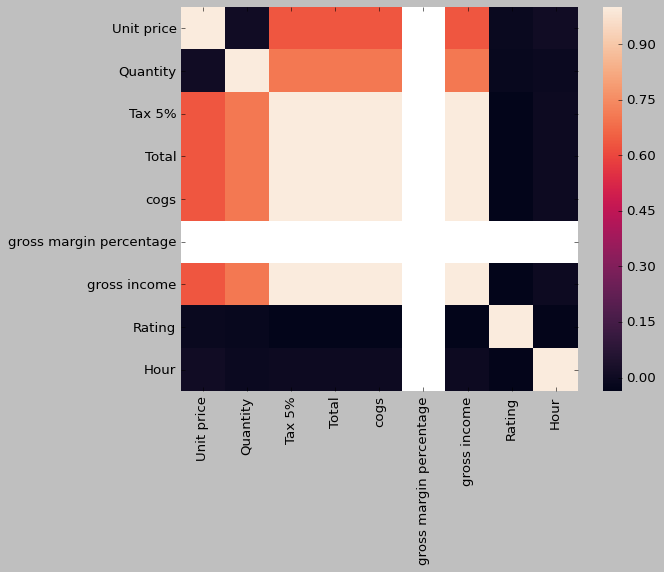

In [33]:
sns.heatmap(df.corr())

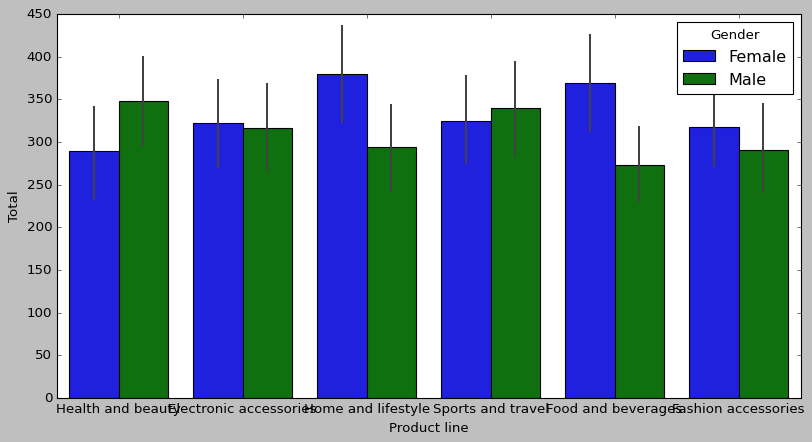

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x="Product line",y="Total" , data = df , hue = "Gender")

Females do more "Home and lifestyle" shopping. Suprisingly, in the category of "Health and beauty" product line, males do more shopping.

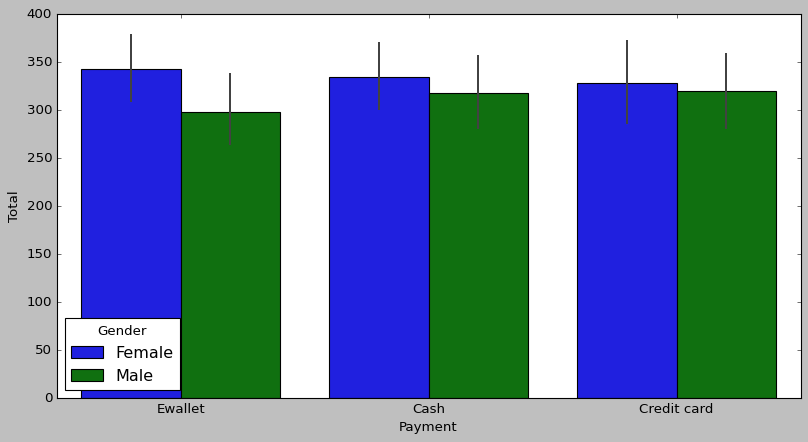

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x="Payment",y="Total" , data = df , hue = "Gender")

More payments are done by "Ewallet". "Credit card" is being used by lesser people.

**Conclusion**


Here is a summary of some of the information's conclusions and observations:

1. There is no correlation between gross income and customer ratings, and the average rating is more or less consistent at approximately 7.

2. Three cities and branches make up the data. Although branch A has slightly larger sales than the others, branch C, or Naypyitaw, has the highest gross revenue.
3. The most popular items in Naypyitaw are food and drink, fashion accessories, and technology accessories. These items should also be prioritised.

4. Male and female consumers make about the same amount of money overall, but female customers spend somewhat more around the 75th percentile.

5. Males spend more on "Health and beauty," which is unexpected considering that females spend more on "fashion accessories." 

6. The category of spending by women that provides the most overall income is "Sports and travel."

7. The majority of clients purchase 10 amounts, and the busiest hour of the day—roughly two in the afternoon—records the biggest sales. Compared to the other days of the week, Tuesdays and Saturdays have larger sales.

8. Even if "fashion accessories" and "food and drinks" get high ratings, few of those items are actually purchased. As a result, the supply of these goods has to be boosted.